# 1. Importation des packages

In [205]:
# Librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Preprocessing et autres
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ## Pour la standardisation des donnees

# Modeles pour le SNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

#Pour la gestion des alertes
import warnings
warnings.filterwarnings('ignore')

In [206]:
data = pd.read_csv('Data/Darknet_2.csv')


data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
0,10.152.152.11-216.58.220.99-57158-443-6,10.152.152.11,57158,216.58.220.99,443,6,7/24/2015 16:09,229,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,8733.624454,229.00000,0.00000,229,229,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,4366.812227,4366.812227,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1892,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
1,10.152.152.11-216.58.220.99-57159-443-6,10.152.152.11,57159,216.58.220.99,443,6,7/24/2015 16:09,407,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4914.004914,407.00000,0.00000,407,407,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2457.002457,2457.002457,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,1987,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
2,10.152.152.11-216.58.220.99-57160-443-6,10.152.152.11,57160,216.58.220.99,443,6,7/24/2015 16:09,431,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,4640.371230,431.00000,0.00000,431,431,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2320.185615,2320.185615,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2049,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
3,10.152.152.11-74.125.136.120-49134-443-6,10.152.152.11,49134,74.125.136.120,443,6,7/24/2015 16:09,359,1,1,0,0,0,0,0.000000,0.000000,0,0,0.0000,0.000000,0.00000,5571.030641,359.00000,0.00000,359,359,0,0.00000,0.00000,0,0,0,0.00000,0.00000,0,0,0,0,0,0,20,20,2785.515320,2785.515320,0,0,0.000000,0.00000,0.000000,2,0,0,0,2,0,0,0,1,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,2008,1047,0,20,0,0,0,0,0.000000e+00,0.000,0.000000e+00,0.000000e+00,Non-Tor,AUDIO-STREAMING
4,10.152.152.11-173.194.65.127-34697-19305-6,10.152.152.11,34697,173.194.65.127,19305,6,7/24/2015 16:09,10778451,591,400,64530,6659,131,0,109.187817,22.283313,498,0,16.6475,46.833714,6604.75239,91.942711,10887.32424,11412.46641,78158,13,10778451,18268.56102,11786.14309,81171,126,10747836,26936.93233,15897.73845,78158,307,1,0,0,0,11820,8000,54.831627,37.111084,0,498,71.876008,56.93647,3241.761603,1,0,0,659,991,0,0,0,0,71.948537,109.187817,16.6475,0,0,0,0,659,6605,0,65,0,6,1382,2320,581,20,0,0,0,0,1.437760e+15,3117718.131,1.437760e+15,1.437760e+15,Non-Tor,AUDIO-STREAMING


In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141530 entries, 0 to 141529
Data columns (total 85 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Flow ID                     141530 non-null  object 
 1   Src IP                      141530 non-null  object 
 2   Src Port                    141530 non-null  int64  
 3   Dst IP                      141530 non-null  object 
 4   Dst Port                    141530 non-null  int64  
 5   Protocol                    141530 non-null  int64  
 6   Timestamp                   141530 non-null  object 
 7   Flow Duration               141530 non-null  int64  
 8   Total Fwd Packet            141530 non-null  int64  
 9   Total Bwd packets           141530 non-null  int64  
 10  Total Length of Fwd Packet  141530 non-null  int64  
 11  Total Length of Bwd Packet  141530 non-null  int64  
 12  Fwd Packet Length Max       141530 non-null  int64  
 13  Fwd Packet Len

In [208]:
data['Label.1'].unique()

array(['AUDIO-STREAMING', 'Browsing', 'Chat', 'Email', 'File-Transfer',
       'File-transfer', 'P2P', 'Video-Streaming', 'Audio-Streaming',
       'Video-streaming', 'VOIP'], dtype=object)

## Trier pour ne garder que deux categories dans Label.1

In [209]:
data = data[data['Label.1'].isin(['Video-Streaming', 'Browsing'])]

data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
326,10.152.152.11-10.152.152.10-54587-53-17,10.152.152.11,54587,10.152.152.10,53,17,2/24/2016 13:59,40796557,2,2,72,104,36,36,36.0,0.0,52,52,52.0,0.0,4.314090e+00,0.098047,13598852.33,19347756.8,35754448,34515,5007594,5007594.0,0.0,5007594,5007594,34515,34515.0,0.0,34515,34515,0,0,0,0,16,16,0.049024,0.049024,36,52,42.4,8.763561,76.8,0,0,0,0,0,0,0,0,1,53.0,36.0,52.0,0,0,0,0,0,0,0,18,0,26,0,0,1,8,0,0,0,0,9.708910e+14,8.408160e+14,1.456340e+15,5007594.0,Non-Tor,Browsing
327,10.152.152.11-54.169.125.186-54339-80-6,10.152.152.11,54339,54.169.125.186,80,6,2/24/2016 14:36,179,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,11173.184360,179.00,0.0,179,179,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,5586.592179,5586.592179,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2640,981,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,Non-Tor,Browsing
328,10.152.152.11-72.21.91.29-37671-80-6,10.152.152.11,37671,72.21.91.29,80,6,2/24/2016 13:53,468,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,4273.504274,468.00,0.0,468,468,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,2136.752137,2136.752137,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1011,980,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,Non-Tor,Browsing
329,184.72.234.198-10.152.152.11-80-58152-6,184.72.234.198,80,10.152.152.11,58152,6,2/24/2016 14:35,12,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,166666.666700,12.00,0.0,12,12,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,83333.333330,83333.333330,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,913,913,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,Non-Tor,Browsing
330,10.152.152.11-10.152.152.10-54275-53-17,10.152.152.11,54275,10.152.152.10,53,17,2/24/2016 14:40,68,2,0,82,0,41,41,41.0,0.0,0,0,0.0,0.0,1.205882e+06,29411.764710,68.00,0.0,68,68,68,68.0,0.0,68,68,0,0.0,0.0,0,0,0,0,0,0,16,0,29411.764710,0.000000,41,41,41.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,61.5,41.0,0.0,0,0,0,0,0,0,1,41,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,Non-Tor,Browsing


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42294 entries, 326 to 140362
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     42294 non-null  object 
 1   Src IP                      42294 non-null  object 
 2   Src Port                    42294 non-null  int64  
 3   Dst IP                      42294 non-null  object 
 4   Dst Port                    42294 non-null  int64  
 5   Protocol                    42294 non-null  int64  
 6   Timestamp                   42294 non-null  object 
 7   Flow Duration               42294 non-null  int64  
 8   Total Fwd Packet            42294 non-null  int64  
 9   Total Bwd packets           42294 non-null  int64  
 10  Total Length of Fwd Packet  42294 non-null  int64  
 11  Total Length of Bwd Packet  42294 non-null  int64  
 12  Fwd Packet Length Max       42294 non-null  int64  
 13  Fwd Packet Length Min       42294

In [211]:
pd.set_option('display.max_rows', None)
data.isnull().sum()


Flow ID                        0
Src IP                         0
Src Port                       0
Dst IP                         0
Dst Port                       0
Protocol                       0
Timestamp                      0
Flow Duration                  0
Total Fwd Packet               0
Total Bwd packets              0
Total Length of Fwd Packet     0
Total Length of Bwd Packet     0
Fwd Packet Length Max          0
Fwd Packet Length Min          0
Fwd Packet Length Mean         0
Fwd Packet Length Std          0
Bwd Packet Length Max          0
Bwd Packet Length Min          0
Bwd Packet Length Mean         0
Bwd Packet Length Std          0
Flow Bytes/s                  18
Flow Packets/s                 0
Flow IAT Mean                  0
Flow IAT Std                   0
Flow IAT Max                   0
Flow IAT Min                   0
Fwd IAT Total                  0
Fwd IAT Mean                   0
Fwd IAT Std                    0
Fwd IAT Max                    0
Fwd IAT Mi

In [212]:
data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].mean(), inplace=True)

data.isnull().sum()

Flow ID                       0
Src IP                        0
Src Port                      0
Dst IP                        0
Dst Port                      0
Protocol                      0
Timestamp                     0
Flow Duration                 0
Total Fwd Packet              0
Total Bwd packets             0
Total Length of Fwd Packet    0
Total Length of Bwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Fwd Packet Length Mean        0
Fwd Packet Length Std         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Bwd Packet Length Mean        0
Bwd Packet Length Std         0
Flow Bytes/s                  0
Flow Packets/s                0
Flow IAT Mean                 0
Flow IAT Std                  0
Flow IAT Max                  0
Flow IAT Min                  0
Fwd IAT Total                 0
Fwd IAT Mean                  0
Fwd IAT Std                   0
Fwd IAT Max                   0
Fwd IAT Min                   0
Bwd IAT 

In [213]:
encoder = LabelEncoder()
data['Flow ID'] = encoder.fit_transform(data['Flow ID'])
data['Src IP'] = encoder.fit_transform(data['Src IP'])
data['Dst IP'] = encoder.fit_transform(data['Dst IP'])
data['Timestamp'] = encoder.fit_transform(data['Timestamp'])
data['Label'] = encoder.fit_transform(data['Label'])
data['Label.1'] = encoder.fit_transform(data['Label.1'])

data['Label.1'].unique()

array([0, 1])

In [214]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [215]:
X.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
326,7045,2,54587,1,53,17,277,40796557,2,2,72,104,36,36,36.0,0.0,52,52,52.0,0.0,4.314090e+00,0.098047,13598852.33,19347756.8,35754448,34515,5007594,5007594.0,0.0,5007594,5007594,34515,34515.0,0.0,34515,34515,0,0,0,0,16,16,0.049024,0.049024,36,52,42.4,8.763561,76.8,0,0,0,0,0,0,0,0,1,53.0,36.0,52.0,0,0,0,0,0,0,0,18,0,26,0,0,1,8,0,0,0,0,9.708910e+14,8.408160e+14,1.456340e+15,5007594.0,0
327,16644,2,54339,1909,80,6,314,179,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,11173.184360,179.00,0.0,179,179,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,5586.592179,5586.592179,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2640,981,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0
328,18763,2,37671,2461,80,6,271,468,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,4273.504274,468.00,0.0,468,468,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,2136.752137,2136.752137,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1011,980,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0
329,25558,553,80,2,58152,6,313,12,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,166666.666700,12.00,0.0,12,12,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,83333.333330,83333.333330,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,913,913,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0
330,6956,2,54275,1,53,17,318,68,2,0,82,0,41,41,41.0,0.0,0,0,0.0,0.0,1.205882e+06,29411.764710,68.00,0.0,68,68,68,68.0,0.0,68,68,0,0.0,0.0,0,0,0,0,0,0,16,0,29411.764710,0.000000,41,41,41.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,61.5,41.0,0.0,0,0,0,0,0,0,1,41,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0


In [216]:
y.head()

326    0
327    0
328    0
329    0
330    0
Name: Label.1, dtype: int32

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.23, random_state=40)

print("X-train:", X_train.shape)
print("X-test:", X_test.shape)
print("y-train:", y_train.shape)
print("y-train:", y_test.shape)

X-train: (9727, 84)
X-test: (32567, 84)
y-train: (9727,)
y-train: (32567,)


In [218]:
pd.set_option('display.max_columns', None)
data.head()

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Packet Length Min,Packet Length Max,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg,Bwd Packet/Bulk Avg,Bwd Bulk Rate Avg,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,FWD Init Win Bytes,Bwd Init Win Bytes,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Label.1
326,7045,2,54587,1,53,17,277,40796557,2,2,72,104,36,36,36.0,0.0,52,52,52.0,0.0,4.314090e+00,0.098047,13598852.33,19347756.8,35754448,34515,5007594,5007594.0,0.0,5007594,5007594,34515,34515.0,0.0,34515,34515,0,0,0,0,16,16,0.049024,0.049024,36,52,42.4,8.763561,76.8,0,0,0,0,0,0,0,0,1,53.0,36.0,52.0,0,0,0,0,0,0,0,18,0,26,0,0,1,8,0,0,0,0,9.708910e+14,8.408160e+14,1.456340e+15,5007594.0,0,0
327,16644,2,54339,1909,80,6,314,179,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,11173.184360,179.00,0.0,179,179,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,5586.592179,5586.592179,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2640,981,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0
328,18763,2,37671,2461,80,6,271,468,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,4273.504274,468.00,0.0,468,468,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,2136.752137,2136.752137,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1011,980,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0
329,25558,553,80,2,58152,6,313,12,1,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.000000e+00,166666.666700,12.00,0.0,12,12,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,83333.333330,83333.333330,0,0,0.0,0.000000,0.0,1,0,0,0,2,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,913,913,0,20,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0
330,6956,2,54275,1,53,17,318,68,2,0,82,0,41,41,41.0,0.0,0,0,0.0,0.0,1.205882e+06,29411.764710,68.00,0.0,68,68,68,68.0,0.0,68,68,0,0.0,0.0,0,0,0,0,0,0,16,0,29411.764710,0.000000,41,41,41.0,0.000000,0.0,0,0,0,0,0,0,0,0,0,61.5,41.0,0.0,0,0,0,0,0,0,1,41,0,0,0,0,1,8,0,0,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0,0


In [219]:
model_dnn = Sequential()

In [220]:
model_dnn.add(Dense(20, input_shape=(84,), activation='relu'))


model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.5))

model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.5))


model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))


model_dnn.add(Dense(32, activation='relu'))
model_dnn.add(Dropout(0.5))


model_dnn.add(Dense(1, activation='sigmoid'))



model_dnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_dnn.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_54 (Dense)                │ (None, 20)             │         1,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,965 (66.27 KB)

 Trainable params: 16,965 (66.27 KB)

 Non-trainable params: 0 (0.00 B)

In [223]:
history = model_dnn.fit(X_train, y_train, epochs=25, verbose=1, validation_data=(X_test, y_test))

Epoch 1/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7785 - loss: 0.5510 - val_accuracy: 0.7754 - val_loss: 0.5339
Epoch 2/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7777 - loss: 0.5390 - val_accuracy: 0.7754 - val_loss: 0.5333
Epoch 3/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7768 - loss: 0.5389 - val_accuracy: 0.7754 - val_loss: 0.5329
Epoch 4/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7799 - loss: 0.5354 - val_accuracy: 0.7754 - val_loss: 0.5334
Epoch 5/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7764 - loss: 0.5370 - val_accuracy: 0.7754 - val_loss: 0.5330
Epoch 6/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7839 - loss: 0.5279 - val_accuracy: 0.7754 - val_loss: 0.5330
Epoch 7/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7749 - loss: 0.5372 - val_accuracy: 0.7754 - val_loss: 0.5328
Epoch 8/25
304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7771 - loss: 0.5349 - val_accuracy: 0.

## Visualisation

In [225]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

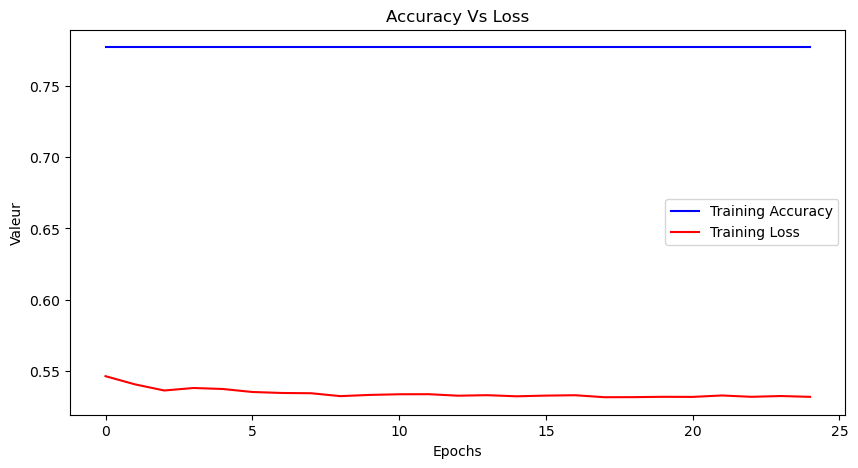

In [226]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss')
plt.legend()
plt.show()

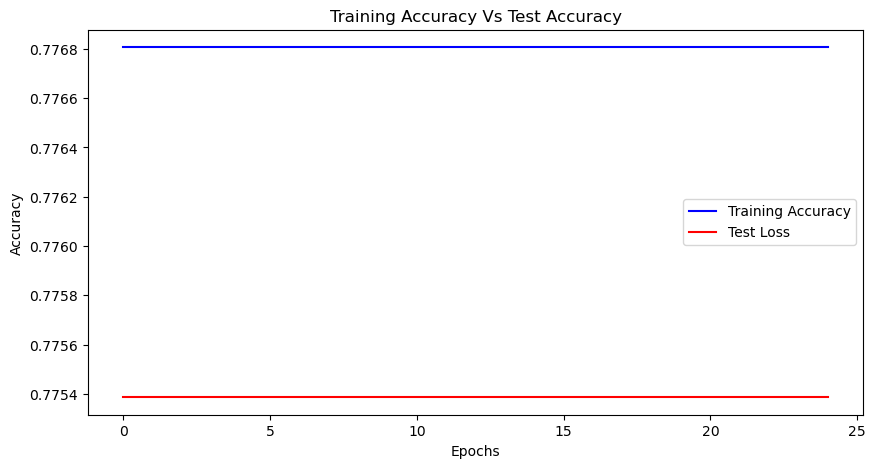

In [227]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.show()

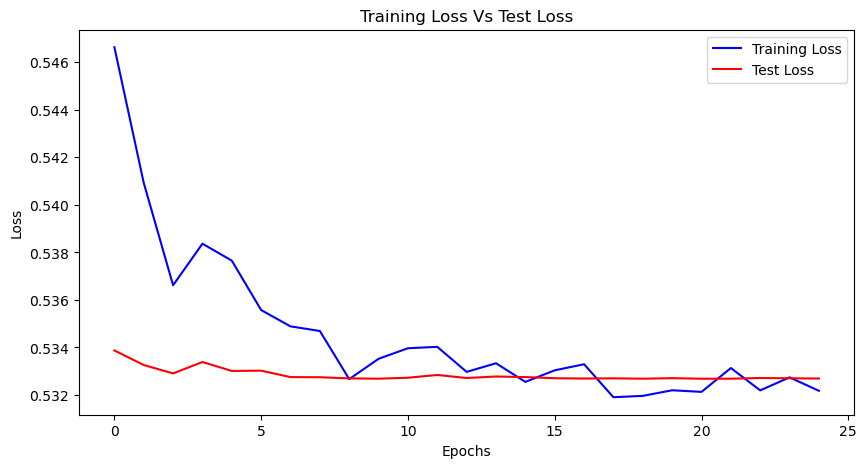

In [228]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.show()

In [ ]:
model_dnn.evaluate(x_test, y_test)

In [ ]:
model.add(Dense(10, input_shape =(80,), activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(90, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation='sigmoid'))



model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()Chap_2__Intelligence-Artificielle.pdf